In [1]:
import librosa
import numpy as np
import IPython.display as ipd
import noisereduce as nr
import matplotlib.pyplot as plt
import librosa.display
import python_speech_features
from python_speech_features import mfcc

C:\Users\Mac\Anaconda3\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
save_path = "data/"
def save_data(path, name, mfc, target):
    np.save(path+name.split("/")[1].split('.')[0]+"__mfcc.npy",mfc)
    np.save(path+name.split("/")[1].split('.')[0]+"__target.npy",target)
    print(path+name.split("/")[1].split('.')[0]+"__mfcc.npy",path+name.split("/")[1].split('.')[0]+"__target.npy")

In [13]:
def Mark(path, rate=44100, wide_win = 0.4, wide_hop = None, n =20 ):
    x , sr = librosa.load(path)
    wide = wide_win
    if wide_hop ==None:
        hop= int(sr*wide/2)
    else:
        hop = wide_hop
    sr = rate
    windows = range(0,x.shape[0],hop)
    my_data_mfcc = np.ndarray([len(windows),20]) 
    my_target = np.ndarray([len(windows)]) 
    for i,wind in enumerate(windows):
        ipd.clear_output()
        dta = x[(wind):(wind+2*hop)]
        print(i,"/",len(windows))
        ipd.display(ipd.Audio(dta,rate=sr))
        #plt.plot(mfcc(dta,sr,1/sr*(2*hop),1/sr*(2*hop), numcep = n, nfft = int(sr*wide) )[0])
        plt.show()
        my_data_mfcc[i] = mfcc(dta,sr,1/sr*(2*hop),1/sr*(2*hop), numcep = n, nfft = int(sr*wide) )[0]
        plt.plot(dta)
        plt.show()
        inp = input()
        try:
            my_target[i] = int(inp)
        except:
            print("i=",i)
            if inp == "close":
                break
            print("неверный формат данных")
            my_target[i] = 0
    print("end")
    return my_data_mfcc, my_target

In [4]:
audio_path = "raw_data/БН_78_1м.wav"
x , sr = librosa.load(audio_path)
sr = 44100

In [43]:
len(range(0,x.shape[0],int(sr*0.2)))

151

In [7]:
import os
files = np.array(os.listdir("raw_data/"))
np.delete(files,0)

array(['sample1.wav', 'sample2.wav', 'sample3.wav', 'Без_нас_78_2.wav',
       'без_насадки_78 .wav', 'БН_78_1м.wav', 'БН_78_1м_mfcc.npy',
       'БН_78_1м_target.npy', 'запись_на_шее.wav'], dtype='<U19')

0 / 151


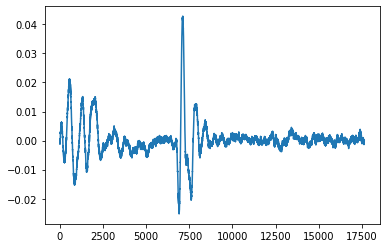

In [ ]:
mfccs, target = Mark(audio_path, wide_hop = int(sr*0.2))

In [45]:
save_data(save_path, audio_path, mfccs, target)

data/БН_78_1м__mfcc.npy data/БН_78_1м__target.npy


In [11]:
np.load("data/"+np.array(os.listdir("data/"))[2])

array([1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.])

Убрать шумы
